In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

year_range=np.arange(2012,2017)
air_quality_years=pd.DataFrame()
for year in year_range:
    file_name = './data/Beijing_'+str(year)+'.csv'
    df = pd.read_csv(file_name,encoding = "ISO-8859-1",skiprows=3)
    
    df = df[df['QC Name']=='Valid']
    df_day= pd.DataFrame()
    df_day['max']=df.groupby(['Month','Day'])['Value'].max()
    df_day['mean']=df[(df['Hour']>8) & (df['Hour']<22)].groupby(['Month','Day'])['Value'].mean()

    air_quality = [50, 100, 150, 200, 300, 500]
    quality_index = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
    city_air_max = pd.DataFrame()
    city_air_mean = pd.DataFrame()
    
    for i in range(len(quality_index)):
        if i==0:
            air_min = 0
        else:
            air_min = air_max
        air_max = air_quality[i]
        #city_air_max[quality_index[i]] = df_day[(df_day['max']>air_min) & (df_day['max']<air_max) ].count()
        city_air_mean[quality_index[i]] = df_day[(df_day['mean']>air_min) & (df_day['mean']<air_max)].count()
        
    #air_quality_years = air_quality_years.append(city_air_max.loc['max'])
    air_quality_years = air_quality_years.append(city_air_mean.loc['mean'])
air_quality_years['years'] = year_range
air_quality_years.reset_index(drop=True,inplace=True)
air_quality_years.to_csv('bj_mean.csv',index=False)

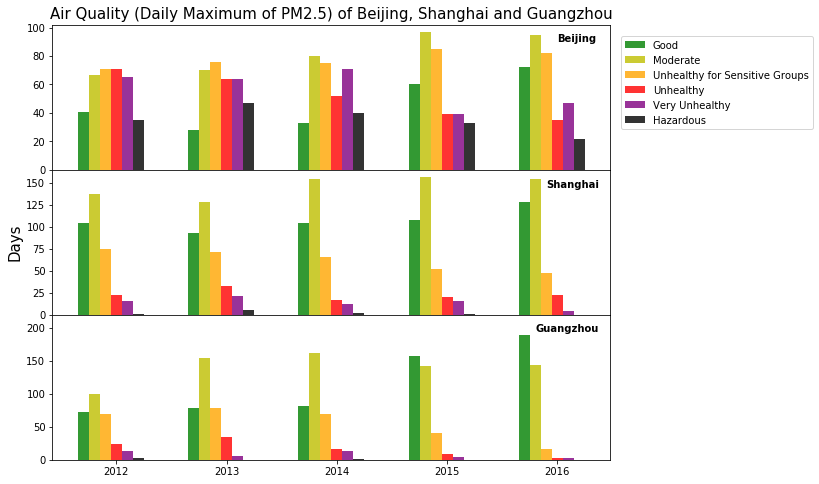

In [8]:
city_list = ['bj','sh','gz']
df={}
for city in city_list:
    file_name = city+'_max.csv'
    df[city] = pd.read_csv(file_name)


fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,8))
x = np.arange(2012,2017)
colors ={'Good':'g','Moderate':'y','Unhealthy for Sensitive Groups':'orange','Unhealthy':'r','Very Unhealthy':'purple','Hazardous':'k'}
air_grade = list(colors.keys())
w = [-0.3,-0.2,-0.1,0,0.1,0.2]
for i in range(3):
    for j in range(len(colors)):
        ax[i].bar(x+w[j],df[city_list[i]][air_grade[j]],width=0.1,color=colors[air_grade[j]],alpha=0.8,label=air_grade[j])

ax[0].set_title('Air Quality (Daily Maximum of PM2.5) of Beijing, Shanghai and Guangzhou',size=15)
legend = plt.legend(bbox_to_anchor=(0.1, .95, 0.8, .95), loc=3, ncol=4, mode='expand',handlelength=1, scatterpoints=1)
legend.get_frame().set_alpha(0)
ax[1].set_ylabel('Days',size=15)
ax[0].text(2016,90,'Beijing',backgroundcolor='White',weight='bold')
ax[1].text(2015.9,145,'Shanghai',backgroundcolor='White',weight='bold')
ax[2].text(2015.8,195,'Guangzhou',backgroundcolor='White',weight='bold')
ax[2].set_ylim([0,220])
plt.legend(bbox_to_anchor=(1.001, 2.6), loc=6, borderaxespad=1)
plt.subplots_adjust(hspace=0)

plt.show()